In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241223_140135.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241223_140135.braidz using pyarrow


In [4]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    60013  1.734959e+09 -0.060602  0.210708 -0.001887   
 1             0    60014  1.734959e+09 -0.060957  0.211223 -0.000656   
 2             0    60015  1.734959e+09 -0.060839  0.210936 -0.000582   
 3             0    60016  1.734959e+09 -0.061049  0.211226  0.000090   
 4             0    60017  1.734959e+09 -0.060860  0.210811 -0.000277   
 ...         ...      ...           ...       ...       ...       ...   
 3946810   17868  7246086  1.735031e+09  0.113728 -0.147697  0.344765   
 3946811   17868  7246087  1.735031e+09  0.120152 -0.144123  0.348489   
 3946812   17868  7246088  1.735031e+09  0.125247 -0.141852  0.349505   
 3946813   17868  7246089  1.735031e+09  0.130809 -0.139736  0.350891   
 3946814   17868  7246090  1.735031e+09  0.135711 -0.138189  0.351731   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.001666 -0.021254 -0.135555  2.187973e-07

In [5]:
data = extract_stimulus_centered_data(df,csvs["opto"])

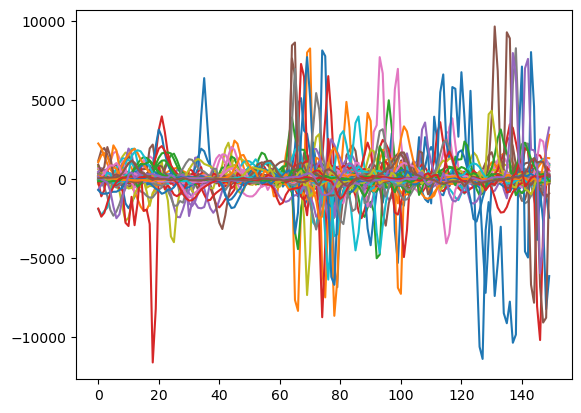

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

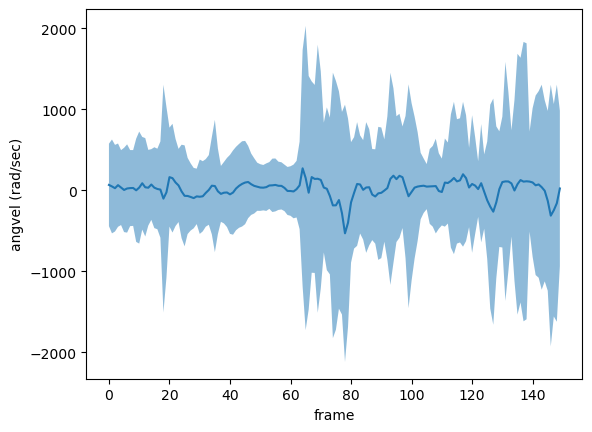

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

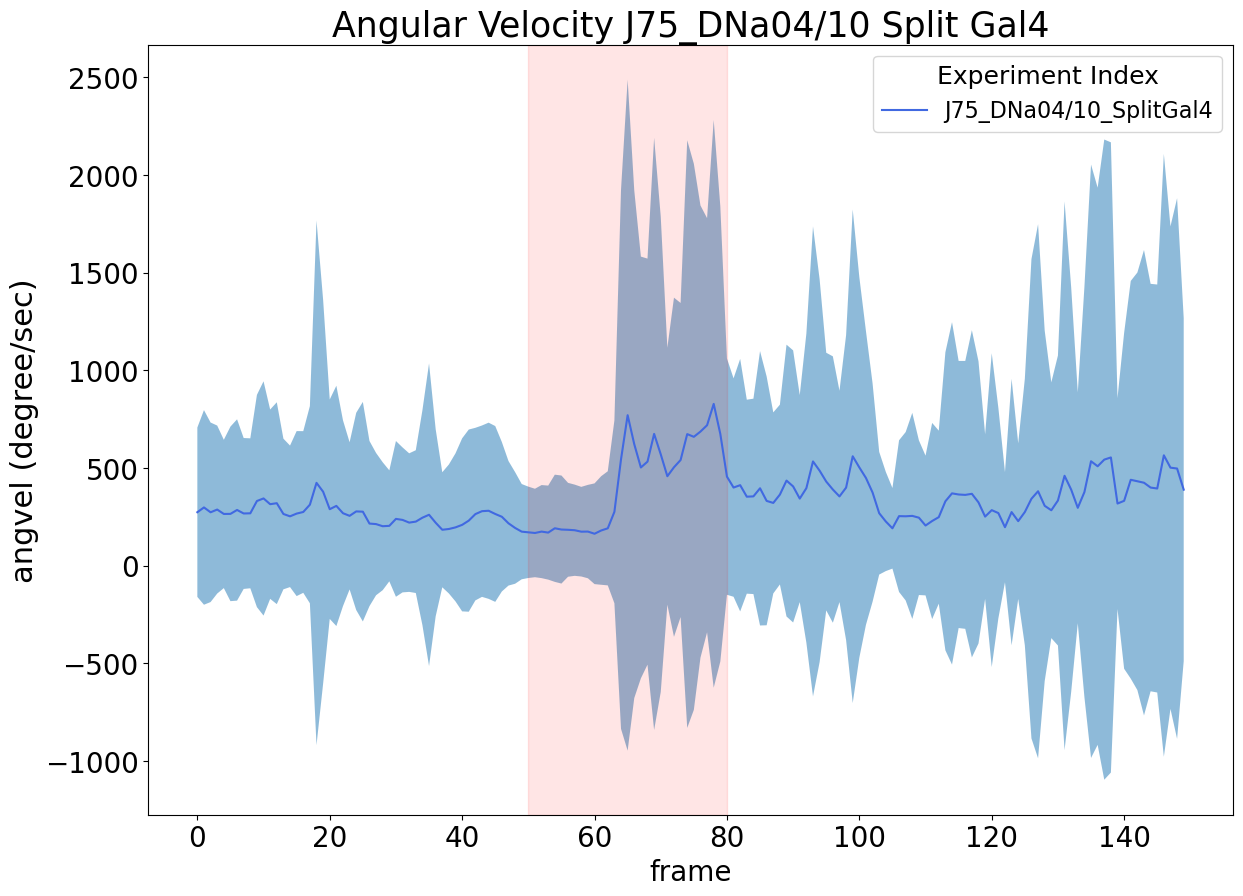

In [9]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='J75_DNa04/10_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J75_DNa04/10 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
